# MAT245 Lab 10

## Multi-Layer Perceptrons

### Structure & Flow of Information

Multi-layer perceptrons (MLPs) are a simple class of neural networks. It's easiest to understand how an MLP works by examining one directly. Below we have a diagram of a basic MLP

<img src="mlp.png">

There are four input neurons, three hidden neurons, and two output neurons.  We can label these as follows:

- inputs: $i_1, \dots, i_4$
- hiddens: $h_1, h_2, h_3$
- outputs: $o_1, o_2$. 

Each line between two neurons represents a connection and has an associated weight. For instance, $i_1$ connects into $h_2$; the weight of the connection between these two is denoted $w_{i_1, h_2}$.   

A network like the above gives a mapping $\mathbb{R}^4 \to \mathbb{R}^2$. Let's see how a sample input vector $(x_1, x_2, x_3, x_4)$ flows through the network.

1. Assign each entry in the input vector to the corresponding input neuron, ie. set $i_1 = x_1, \dots, i_4 = x_4$.
2. Compute the activations of the hidden neurons via the formula
\begin{align*}
h_i 
  &= 
f(w_{i_1,h_i} i_1 + \dots w_{i_4,h_i} i_4) \\
  &= 
f(\textbf{w}^{h_i} \cdot \textbf{i})
\end{align*}
where $f$ is the network's *activation function*. The most common activation functions are the relu, sigmoid and tanh functions (pictured below). Notice that we simply compute the dot product of the incoming weights with the inputs and plug the result into the activation function $f$. 
3. Compute the activations of the output neurons via a similar forumla:
\begin{align*}
o_i 
  &= 
f(w_{h_1,o_i} h_1 + w_{h_2,o_i} h_2 + w_{h_3,o_i} h_3) \\
  &=
f(\textbf{w}^{o_i} \cdot \textbf{h}).
\end{align*}

So the neural network implements the map $(\textbf{x}, \textbf{w}) \mapsto F_{\mathrm{net}}(\textbf{x}, \textbf{w}) = (o_1, o_2)$
where the outputs $(o_1, o_2)$ are obtained from the process above. 

### Graphs of common activations

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn import datasets, mixture

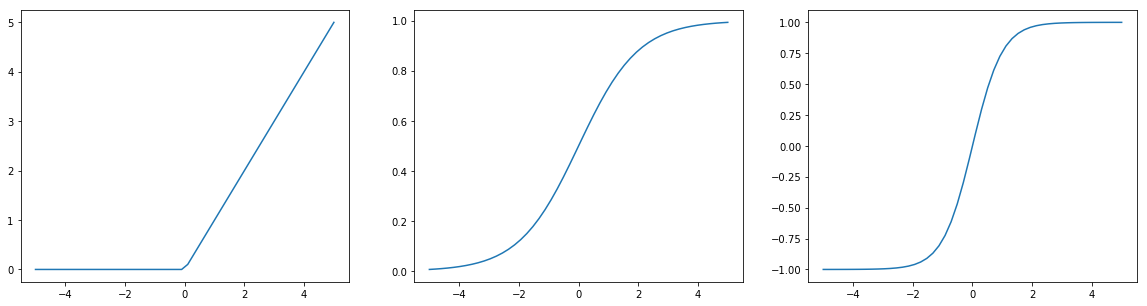

In [27]:
xs = np.linspace(-5, 5)
fig = plt.figure(figsize=(20, 5))

## Plot relu
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(xs, np.maximum(0, xs)) 

## Plot sigmoid
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(xs, expit(xs))

## Plot tanh
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(xs, np.tanh(xs))

plt.show()

### Training a multi-layer perceptron

Suppose $\textbf{x}_1, \dots, \textbf{x}_n$ are samples of data. Each data point $\textbf{x}_i$ is associated to a target value $\textbf{y}_i$, and we want to train a neural network to approximate the mapping $\textbf{x}_i \mapsto \textbf{y}_i$. We do so by choosing the weights $\textbf{w}$ that minimize some error function. For example, if $E$ is the mean squared error function,

$$
E(\textbf{w}) = \frac{1}{n-1} \sum_{i=1}^n \| F_{\mathrm{net}}(\textbf{x}_i, \textbf{w}) - \textbf{y}_i \|^2.
$$

In practice we usually have to approximate the optimal weights using a process like gradient descent. 

### Classification using a multi-layer perceptron

In a classification task, we try to assign each input $\textbf{x}_i$ to one of $n$ different classes/categories. Essentially, we're trying to predict the correct label for the data point. Here's how an MLP is typically used to perform a classification task:

#### The data

For a classification problem with $n$ classes, the targets $\textbf{y}_i$ are usually one-hot encoded. That is, if sample $\textbf{x}_i$ belongs to the $k^{th}$ class, the corresponding $\textbf{y}_i$ is a zero vector except for a single entry of `1.0` in the $k^{th}$ position.
$$
\textbf{y}_i = \left( 0.0, 0.0, \dots, 1.0, \dots, 0.0\right).
$$
We interpret this $\textbf{y}_i$ as a probability distribution that assigns all of the probability to the true class. 

#### Converting outputs to probabilities 

A standard MLP outputs a vector in $\mathbb{R}^n$. This output needs to be converted into a probability distribution over the $n$ classes. To do so we can apply the $\mathrm{softmax}$ function. Recall that the $\textrm{softmax}$ of a vector $\textbf{x} \in \mathbb{R}^n$ is

$$
\textrm{softmax}(\textbf{x}) = (\sigma(\textbf{x})_1, \dots, \sigma(\textbf{x})_n) = \left( \frac{e^{x_1}}{\sum_{j=1}^n e^{x_j}}, \dots, \frac{e^{x_n}}{\sum_{j=1}^n e^{x_j}} \right).
$$

Since $\sum_{j=1}^n \sigma(F_\textrm{net}(\textbf{x}, \textbf{w}))_j = 1$, applying softmax turns the output of an MLP into a probability distribution. 

#### Choosing an appropriate error function

A common loss function for probability distributions is the cross-entropy loss.  The cross entropy between two distributions $\textbf{p} = (p_1, p_2, \dots, p_n)$ and $\textbf{q} = (q_1, q_2, \dots, q_n)$ is given by the formula
$$
\textrm{cross-entropy}(\textbf{p}, \textbf{q}) = -\sum_{j=1}^n p_i \log(q_i).
$$
Here we interpret $\textbf{p}$ as the "true" distribution, and $\textbf{q}$ is the approximatation we want to evaluate.
Lower cross-entropy scores are better. For our application, we want to measure the cross-entropy between the true distribution $\textbf{y}_i$ and the prediction $\mathrm{softmax}(F_\textrm{net}(\textbf{x}, \textbf{w}))$. The formula in this case is:
$$
\textrm{cross-entropy}(F_\text{net}(\textbf{x}_i, \textbf{w}), \textbf{y}_i) = -\sum_{j=1}^n y_{i, j} \log (\sigma (F_\text{net}(\textbf{x}_i, \textbf{w})_j))
$$

### Goals (1)

The iris dataset consists of measurements of the sepal length, sepal width, petal length, and petal width of three different kinds of iris flowers. Our first goal is to build an MLP using `sklearn` to classify the irises. For visualization reasons, we will only use two of the input dimensions. 

- Load the `sklearn` iris dataset, selecting any two dimensions from the sample data for inputs into the neural network, and partition the data into 70% training and 30% validation sets. For example, to load the first two columns:

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]
0.822222222222


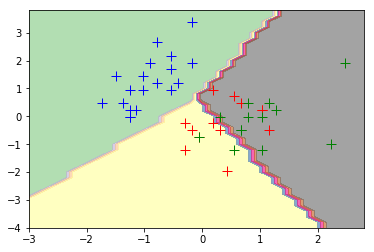

In [103]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

iris = datasets.load_iris()
xs = iris.data[:, 0:2]
ys = iris.target

# to training set and validation set
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.30, random_state=42)

# scale the data separately
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# default classifier
MLP = MLPClassifier(activation= 'tanh', hidden_layer_sizes= 100 ,alpha=0.0001)
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)
print y_test
print y_pred
print metrics.accuracy_score(y_test, y_pred)

plt.figure()

plt.plot(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 'b+', ms=10)
plt.plot(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 'r+', ms=10)
plt.plot(X_test[y_test == 2, 0], X_test[y_test == 2, 1], 'g+', ms=10)

xx, yy = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-4, 4, 0.2))
Z = MLP.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=.6)

plt.show()


- Neural networks tend to perform better when the inputs are scaled to have zero mean and unit variance. Use `sklearn.preprocessing.StandardScaler` to appropriately scale the training and test sets. **Note:** While you have to transform both the training and test data, be sure to fit the scaler using the training data *only*. 
- Use `sklearn.neural_network.MLPClassifier` with cross-entropy error (the default and only choice) to train an MLP on the subset of the iris data you selected. Note that `sklearn` will automatically one-hot encode the iris classes for the training process. 
- Make a scatter plot of your validation set. Colour code the points based on the type of iris they represent.
- Make a filled contour plot (see `matplotlib.pyplot.contourf`) to visualize the decision boundaries of your classifier. (See below for an example filled contour plot). How do the decision boundaries compare to your scatter plot above?
- Repeat the plots above for two different choices of activation function. So if you used sigmoid activations above, plot the results of using relu and tanh activations also. 

### Example of a filled contour plot

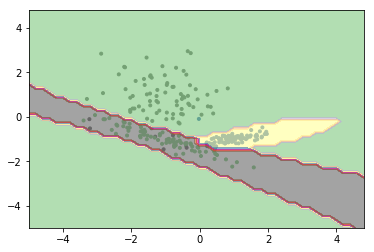

In [17]:
X, y = datasets.make_classification(n_samples=250, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
gmm = mixture.GaussianMixture(n_components=3).fit(X, y)

xx, yy = np.meshgrid(np.arange(-5, 5, 0.2), np.arange(-5, 5, 0.2))
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent, marker='.')
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=.6)
plt.show()

### Goals (2):

There are a lot of parameters to tune in a neural network. The most important of these are the shape of the network, and the type of activation functions used. The easiest way to evaluate different combinations of parameters is to simply try every single one. This approach is called 'grid search'. If you have enough computing power, grid search is a good way to find optimal parameters. 

To help with fitting a models for a grid search, `sklearn` provides the class `sklearn.model_selection.GridSearchCV`. 

- Use `sklearn.model_selection.GridSearchCV` to evaluate different combinations of hidden layer shapes and activation functions (as well as any other parameters you want to experiment with). 

### Goals (3):

If you have enough time, try fitting a support vector machine (with your choice of kernel function, see `sklearn.svm.SVC`) to classify the iris dataset. Compare the decision boundaries. 

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]
0.8


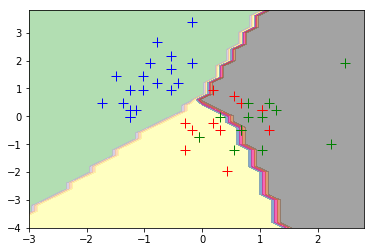

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_activation,param_alpha,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
51,0.109333,0.000333,0.813333,0.810061,tanh,0.00015,100,"{u'alpha': 0.00015, u'activation': u'tanh', u'...",1,0.784314,0.838384,0.823529,0.787879,0.833333,0.803922,0.007409,4.714827e-04,0.021205,0.021071
43,0.085333,0.000000,0.806667,0.796791,tanh,0.0005,80,"{u'alpha': 0.0005, u'activation': u'tanh', u'h...",2,0.764706,0.818182,0.862745,0.787879,0.791667,0.784314,0.004784,0.000000e+00,0.041712,0.015195
52,0.120667,0.001000,0.806667,0.806694,tanh,0.00015,110,"{u'alpha': 0.00015, u'activation': u'tanh', u'...",2,0.784314,0.828283,0.803922,0.787879,0.833333,0.803922,0.003682,1.123916e-07,0.020000,0.016611
39,0.096000,0.000000,0.800000,0.803327,tanh,0.0003,100,"{u'alpha': 0.0003, u'activation': u'tanh', u'h...",4,0.764706,0.818182,0.823529,0.787879,0.812500,0.803922,0.002160,0.000000e+00,0.025725,0.012378
53,0.116000,0.000000,0.800000,0.796593,tanh,0.00015,120,"{u'alpha': 0.00015, u'activation': u'tanh', u'...",4,0.784314,0.808081,0.784314,0.777778,0.833333,0.803922,0.009899,0.000000e+00,0.022866,0.013413
48,0.088000,0.000000,0.793333,0.803228,tanh,0.00015,70,"{u'alpha': 0.00015, u'activation': u'tanh', u'...",6,0.784314,0.808081,0.803922,0.787879,0.791667,0.813725,0.004546,0.000000e+00,0.008165,0.011096
37,0.095667,0.000333,0.786667,0.796593,tanh,0.0003,80,"{u'alpha': 0.0003, u'activation': u'tanh', u'h...",7,0.745098,0.787879,0.803922,0.797980,0.812500,0.803922,0.001700,4.714827e-04,0.030038,0.006622
40,0.105333,0.000333,0.786667,0.803426,tanh,0.0003,110,"{u'alpha': 0.0003, u'activation': u'tanh', u'h...",7,0.784314,0.838384,0.784314,0.777778,0.791667,0.794118,0.003682,4.714827e-04,0.003430,0.025603
49,0.089000,0.000000,0.786667,0.806595,tanh,0.00015,80,"{u'alpha': 0.00015, u'activation': u'tanh', u'...",7,0.764706,0.808081,0.823529,0.797980,0.770833,0.813725,0.006377,0.000000e+00,0.026575,0.006513
42,0.085333,0.000000,0.780000,0.813230,tanh,0.0005,70,"{u'alpha': 0.0005, u'activation': u'tanh', u'h...",10,0.764706,0.818182,0.803922,0.797980,0.770833,0.823529,0.003399,0.000000e+00,0.017349,0.011003


In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pandas as pd

iris = datasets.load_iris()
xs = iris.data[:, 0:2]
ys = iris.target

# to training set and validation set
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.30, random_state=42)

# scale the data separately
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# default classifier
MLP = MLPClassifier()
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)

print y_test
print y_pred
print metrics.accuracy_score(y_test, y_pred)

plt.figure()

plt.plot(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 'b+', ms=10)
plt.plot(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 'r+', ms=10)
plt.plot(X_test[y_test == 2, 0], X_test[y_test == 2, 1], 'g+', ms=10)

xx, yy = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-4, 4, 0.2))
Z = MLP.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=.6)

plt.show()

# examples of a parameter object
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
parameters = {'hidden_layer_sizes': [ 70, 80, 90, 100, 110, 120], 'activation': ['identity', 'logistic', 'tanh', 'relu'],'alpha' :[0.0003, 0.0005, 0.00015] }
clf = GridSearchCV(MLP, parameters)
clf.fit(xs, ys)

df = pd.DataFrame(clf.cv_results_)
df.sort_values(by=['rank_test_score'])
